In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv('Company_Data.csv')

In [4]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
Sales          400 non-null float64
CompPrice      400 non-null int64
Income         400 non-null int64
Advertising    400 non-null int64
Population     400 non-null int64
Price          400 non-null int64
ShelveLoc      400 non-null object
Age            400 non-null int64
Education      400 non-null int64
Urban          400 non-null object
US             400 non-null object
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [30]:
df['Sales'].value_counts()

7.80     4
6.67     3
8.77     3
9.32     3
5.87     3
        ..
8.89     1
13.39    1
9.14     1
5.07     1
9.50     1
Name: Sales, Length: 336, dtype: int64

In [33]:
df['Sales'] = df.Sales.astype('int')

In [35]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11,111,48,16,260,83,Good,65,10,Yes,Yes
2,10,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4,141,64,3,340,128,Bad,38,13,Yes,No


In [6]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [7]:
df.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002928BBCB348>,
      dtype=object)

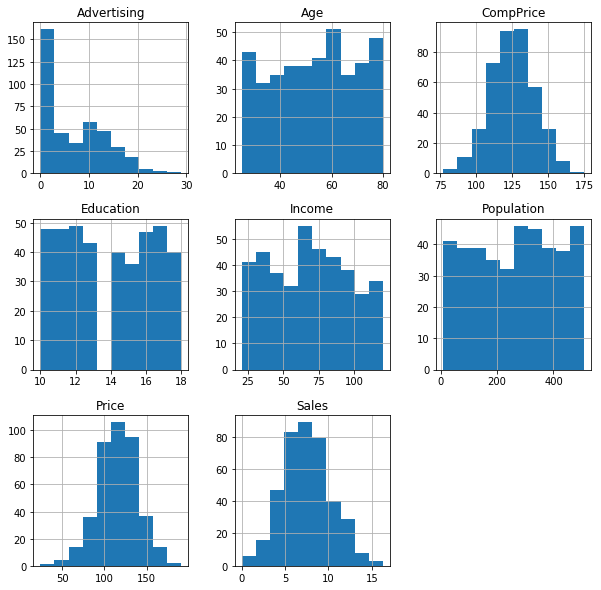

In [8]:
df.hist(bins=10, figsize=(10,10))

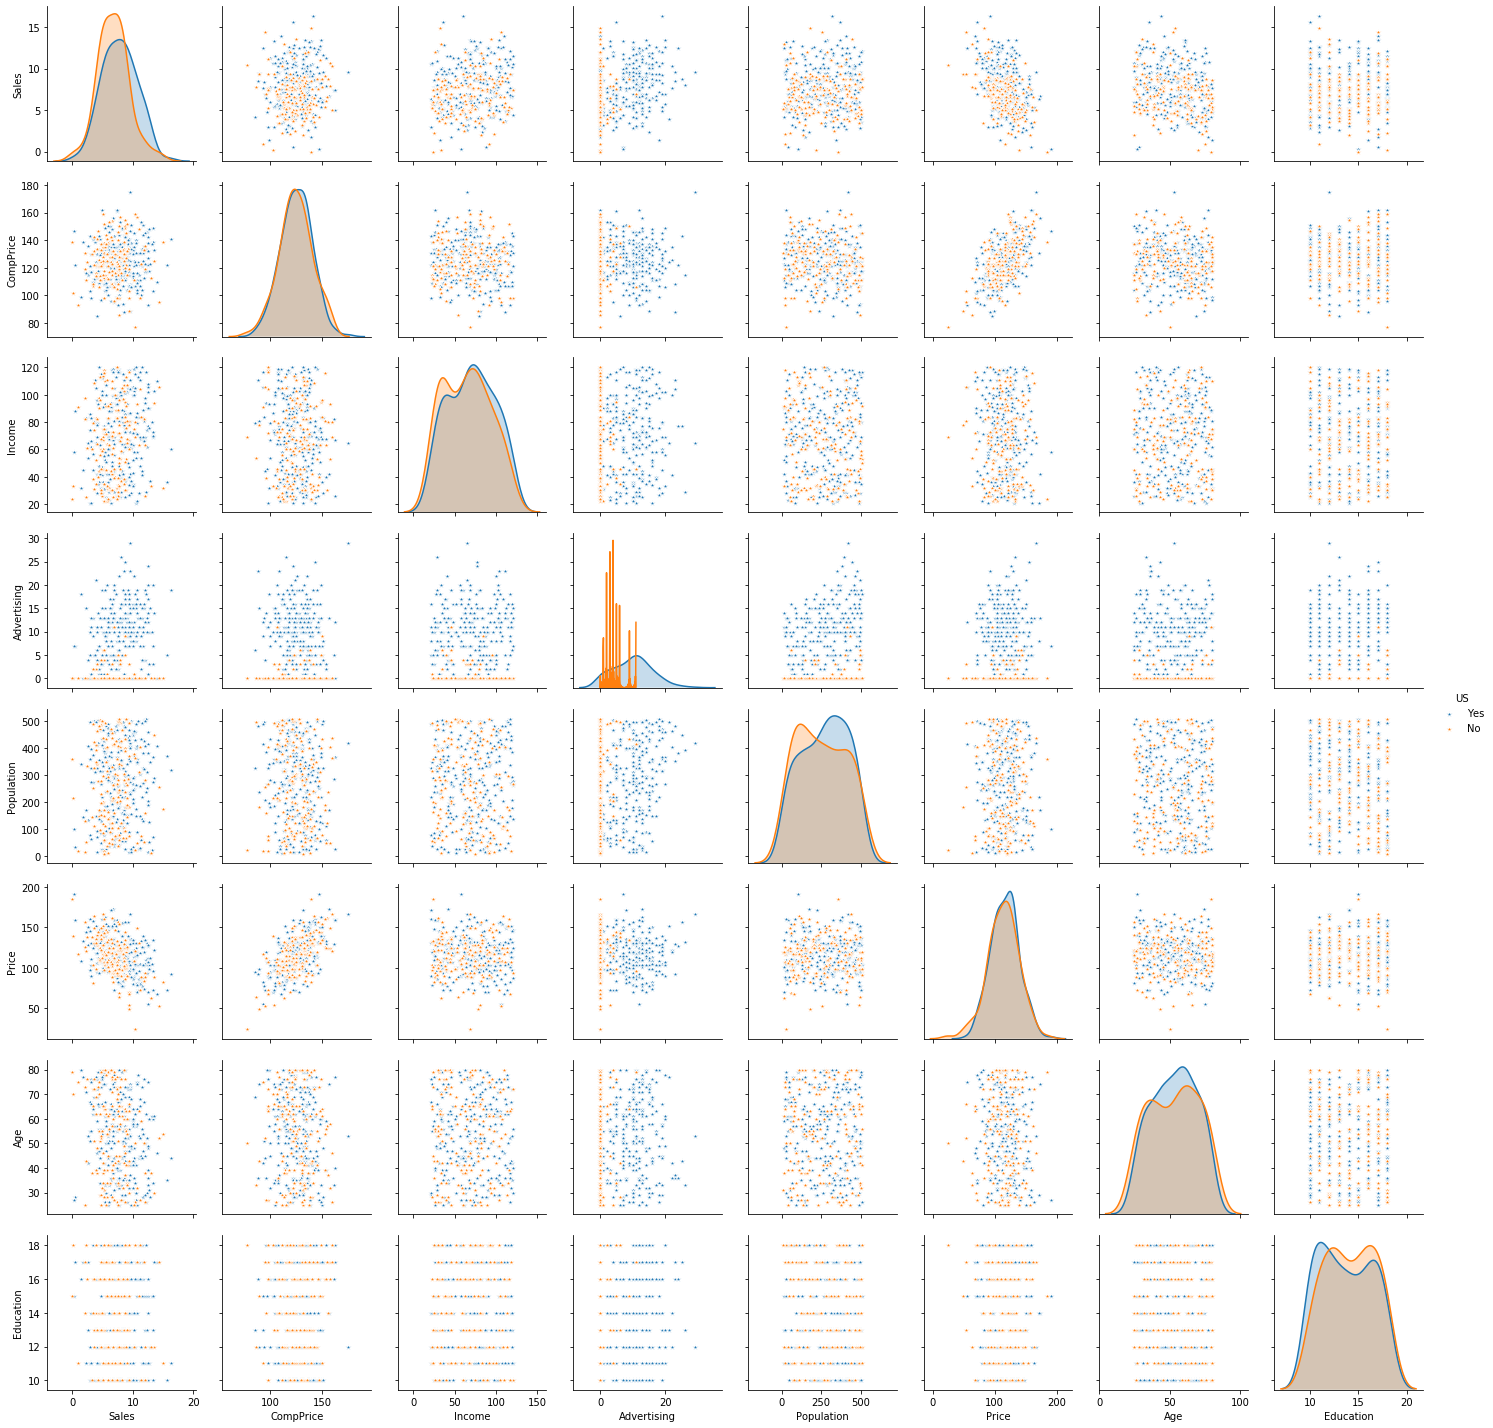

In [9]:
sns.axes_style(style='dark')
sns.pairplot(df, hue='US', markers='*')

In [36]:
X = df.drop('Sales', axis=1)

In [37]:
y = df['Sales']

In [38]:
print(X.shape)
print(y.shape)

(400, 10)
(400,)


In [10]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le_ShelveLoc = LabelEncoder()
le_Urban = LabelEncoder()
le_US = LabelEncoder()

In [39]:
X['ShelveLoc_n'] = le_ShelveLoc.fit_transform(X['ShelveLoc'])
X['Urban_n'] = le_Urban.fit_transform(X['Urban'])
X['US_n'] = le_US.fit_transform(X['US'])

In [20]:
X.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,ShelveLoc_n,Urban_n,US_n
0,138,73,11,276,120,Bad,42,17,Yes,Yes,0,1,1
1,111,48,16,260,83,Good,65,10,Yes,Yes,1,1,1
2,113,35,10,269,80,Medium,59,12,Yes,Yes,2,1,1
3,117,100,4,466,97,Medium,55,14,Yes,Yes,2,1,1
4,141,64,3,340,128,Bad,38,13,Yes,No,0,1,0


In [45]:
X.drop(['ShelveLoc', 'Urban', 'US'], axis=1, inplace=True)

In [46]:
X.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_n,Urban_n,US_n
0,138,73,11,276,120,42,17,0,1,1
1,111,48,16,260,83,65,10,1,1,1
2,113,35,10,269,80,59,12,2,1,1
3,117,100,4,466,97,55,14,2,1,1
4,141,64,3,340,128,38,13,0,1,0


In [ ]:
from sklearn 

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
model = DecisionTreeClassifier()

In [49]:
model.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [50]:
model.score(X, y)

1.0